# Microstate Analysis Library Illustrated by Examples

## Part one: Loading the library and query monte carlo sampling environment
Load microstate analysis library. This library provides the following variables and functions:

In [1]:
from ms_analysis import *


### Universal constants:
Once the library is loaded, you can view some constants used by the library.

These are energy unit conversion constants at temperature 298.15 K

In [2]:
print("1 ph unit = %.3f Kcal" % ph2Kcal)
print("1 Kcal = %.3f kT at 298.15K:" % Kcal2kT)

1 ph unit = 1.364 Kcal
1 Kcal = 1.688 kT at 298.15K:


### Load a microstate file from Monte Carlo sampling output

Go to a working directory. The essential files for microstate analysis are:
* head3.lst file
* ms_out folder that contains Monte Carlo sanoling microstate output

Since Monte Carlo sampling was generally carried out at multiple pH or Ehs, you need to specify which file to load.

A monte carlo object is reqired to be initilized to hold the microstates.

Finally, read the data into the object.

In [3]:
%cd ~/ms_analysis/4lzt
msfile = "ms_out/pH5eH0ms.txt"
mc = MC()
mc.readms(msfile)

/home/jupyter-jmao/ms_analysis/4lzt
Reading MC:0


A Monte Carlo sampling has 6 independent tuns. It's possible to read selected runs from microstate file.

<span style="color:red">Any call of function readms() will overwrite previously loaded microstates instead of appending the microstates.</span>


Reading partial Monte Carlo sampling microstates is supported. 

By default, a Monte Carlo sampling is carried out 6 times and is numbered as 0, 1, 2, ..., 5.

In [4]:
mc.readms(msfile, MC=[1,2])

Reading MC:1
Reading MC:2


### Microstate environment:

In [5]:
print("MC temperature = %.3f" % mc.T)
print("MC pH = %.2f" % mc.pH)
print("MC Eh = %.2f" % mc.Eh)
print("MC Method (Monte Carlo sampling or Analytical solution): %s" % mc.method)

MC temperature = 298.150
MC pH = 5.00
MC Eh = 0.00
MC Method (Monte Carlo sampling or Analytical solution): MONTERUNS


### Monte Carlo sampling basic information

The basic information of the Monte Carlo sampling includes:
- Total number of microstates (this is also the Monte Carlo sampling steps)
- Number of unique microstates (one microstate may be visited and retained multiple times)

In [6]:
print("MC total number of microstates = %d" % mc.counts)
print("Number of unique microstates = %d" % len(mc.microstates))

MC total number of microstates = 2200000
Number of unique microstates = 710067


## Part two: Query conformer and residue information

### Query conformer information
Conformers are in a list of conformer records. Each conformer record contains a conformer id, serial number, residue id and charge. The conformer index iconf starts with 0, so it is 1 less than that in head3.lst.

In [7]:
for conf in mc.conformers:
    print("%s: iconf=%4d, Residue=%s, charge=%6.3f" % (conf.confid, conf.iconf, conf.resid, conf.crg))

NTR01A0001_001: iconf=   0, Residue=NTRA0001_, charge= 0.000
NTR+1A0001_002: iconf=   1, Residue=NTRA0001_, charge= 1.000
LYS01A0001_001: iconf=   2, Residue=LYSA0001_, charge= 0.000
LYS01A0001_002: iconf=   3, Residue=LYSA0001_, charge= 0.000
LYS01A0001_003: iconf=   4, Residue=LYSA0001_, charge= 0.000
LYS01A0001_004: iconf=   5, Residue=LYSA0001_, charge= 0.000
LYS+1A0001_005: iconf=   6, Residue=LYSA0001_, charge= 1.000
LYS+1A0001_006: iconf=   7, Residue=LYSA0001_, charge= 1.000
LYS+1A0001_007: iconf=   8, Residue=LYSA0001_, charge= 1.000
LYS+1A0001_008: iconf=   9, Residue=LYSA0001_, charge= 1.000
VAL01A0002_001: iconf=  10, Residue=VALA0002_, charge= 0.000
PHE01A0003_001: iconf=  11, Residue=PHEA0003_, charge= 0.000
PHE01A0003_002: iconf=  12, Residue=PHEA0003_, charge= 0.000
ARG01A0005_001: iconf=  13, Residue=ARGA0005_, charge= 0.000
ARG01A0005_002: iconf=  14, Residue=ARGA0005_, charge= 0.000
ARG01A0005_003: iconf=  15, Residue=ARGA0005_, charge= 0.000
ARG01A0005_004: iconf=  

### Get fixed conformer information

In Monte Carlo sampling, some conformers are "fixed", that is, never selected or always selected. This is due to the energy constraints (energy too high) or choice limit (single conformer in a residue).

MC.fixedconfs itself is a list of conformer indices. To know the fixed conformer details, one needs to look up from conformer records by the indices.

In [8]:
for iconf in mc.fixedconfs:
    conf = mc.conformers[iconf]
    print("index=%4d: %s, iconf=%4d, Residue=%s, charge=%6.3f" % (iconf, conf.confid, conf.iconf, conf.resid, conf.crg))

index=  10: VAL01A0002_001, iconf=  10, Residue=VALA0002_, charge= 0.000
index=  47: CYD01A0006_001, iconf=  47, Residue=CYDA0006_, charge= 0.000
index=  87: ALA01A0009_001, iconf=  87, Residue=ALAA0009_, charge= 0.000
index=  88: ALA01A0010_001, iconf=  88, Residue=ALAA0010_, charge= 0.000
index=  89: ALA01A0011_001, iconf=  89, Residue=ALAA0011_, charge= 0.000
index= 192: TYR01A0023_001, iconf= 192, Residue=TYRA0023_, charge= 0.000
index= 201: LEU01A0025_001, iconf= 201, Residue=LEUA0025_, charge= 0.000
index= 210: VAL01A0029_001, iconf= 210, Residue=VALA0029_, charge= 0.000
index= 211: CYD01A0030_001, iconf= 211, Residue=CYDA0030_, charge= 0.000
index= 212: ALA01A0031_001, iconf= 212, Residue=ALAA0031_, charge= 0.000
index= 213: ALA01A0032_001, iconf= 213, Residue=ALAA0032_, charge= 0.000
index= 251: PHE01A0034_001, iconf= 251, Residue=PHEA0034_, charge= 0.000
index= 278: ASN01A0039_001, iconf= 278, Residue=ASNA0039_, charge= 0.000
index= 286: ALA01A0042_001, iconf= 286, Residue=ALA

### Query the conformer from index number and vise versa

In [9]:
conf = mc.conformers[1200]
print(conf.confid)

TRP01A0123_001


In [10]:
iconf = mc.iconf_by_confname["TRP01A0123_001"]
print(iconf)

1200


### Query free residue

Residues that don't have choice of conformers are fixed residues, and other residues may have multiple selectable conformers. They are "free" residues and participating the composition of microstate.

A microstate is a selection of one conformer from each free residue. Therefore what residues are free residues (meaning sampled by MC), and what conformers are the selection candidates in the free residues are important to know. A free residue has at least two conformers to choose from.

Free residues (MC.free_residues) are in a list and each free residue is a list of conformer candidates.

Free residues are also listed as names (MC.free_residue_names).

In [11]:
# free residues and its conformers
for ires in range(len(mc.free_residues)):
    print("%3d %s %s" % (ires, mc.free_residue_names[ires], mc.free_residues[ires]))

  0 NTRA0001_ [0, 1]
  1 LYSA0001_ [6, 7, 8, 9]
  2 PHEA0003_ [11, 12]
  3 ARGA0005_ [40, 41, 43, 44, 45]
  4 GLUA0007_ [50, 55, 57, 59, 60, 61, 63, 64, 65, 70, 73, 75, 79, 80, 81, 82, 83, 84]
  5 LEUA0008_ [85, 86]
  6 META0012_ [90, 91, 92]
  7 LYSA0013_ [101, 102, 103, 104, 105]
  8 ARGA0014_ [125, 127, 128, 130]
  9 HISA0015_ [131, 133, 135, 137, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 155, 156]
 10 LEUA0017_ [157, 158, 159]
 11 ASPA0018_ [162, 164, 165, 168, 169]
 12 ASNA0019_ [170, 171]
 13 TYRA0020_ [172, 174, 175, 176]
 14 ARGA0021_ [189, 190, 191]
 15 SERA0024_ [196, 197, 198, 199, 200]
 16 ASNA0027_ [203, 204, 205, 206, 207]
 17 TRPA0028_ [208, 209]
 18 LYSA0033_ [233, 234, 237, 239, 241, 242, 243]
 19 GLUA0035_ [253, 254, 258, 259, 261, 263, 264]
 20 SERA0036_ [267, 268, 269]
 21 ASNA0037_ [270, 271, 272, 273, 274]
 22 PHEA0038_ [275, 277]
 23 THRA0040_ [280, 281]
 24 GLNA0041_ [282, 283, 284, 285]
 25 THRA0043_ [287, 288, 289, 290, 291, 292, 293, 29

### Knowing the conformer index number, you can find the free residue index number it belongs to.

In [12]:
ic = 1200    # pick 1200th conformer 
ir = mc.ires_by_iconf[ic]  # find the index number of the free residue this conformer belongs
print(mc.ires_by_iconf[1200])      # print the residue index
print(mc.free_residue_names[ir])   # print the residue name

81
TRPA0123_


### Q: What happens if we query a conformer that is not in free residue?

It will return a key error.

If we want to avoid program exit due to this error, we need to capture the error by try block and handle it accordingly.

In [13]:
print(mc.fixedconfs)   # show fixed conformers
for ic in mc.fixedconfs:
    print(ic, mc.conformers[ic].confid)   # show conformer names of each fixed conformer

[10, 47, 87, 88, 89, 192, 201, 210, 211, 212, 213, 251, 278, 286, 694, 696, 842, 891, 899, 904, 905, 911, 974, 980, 995, 996, 1053, 1093, 1100, 1153, 1199, 1246, 1329]
10 VAL01A0002_001
47 CYD01A0006_001
87 ALA01A0009_001
88 ALA01A0010_001
89 ALA01A0011_001
192 TYR01A0023_001
201 LEU01A0025_001
210 VAL01A0029_001
211 CYD01A0030_001
212 ALA01A0031_001
213 ALA01A0032_001
251 PHE01A0034_001
278 ASN01A0039_001
286 ALA01A0042_001
694 TRP01A0063_001
696 CYD01A0064_001
842 PRO01A0070_001
891 ASN01A0074_001
899 CYD01A0076_001
904 PRO01A0079_001
905 CYD01A0080_001
911 ALA01A0082_001
974 ALA01A0090_001
980 VAL01A0092_001
995 CYD01A0094_001
996 ALA01A0095_001
1053 VAL01A0099_001
1093 ALA01A0107_001
1100 ALA01A0110_001
1153 CYD01A0115_001
1199 ALA01A0122_001
1246 CYD01A0127_001
1329 LEU01A0129_001


In [14]:
ic = 212    # This is a fixed residue ALA A31

try:
    ir = mc.ires_by_iconf[ic]  # find the index number of the free residue this conformer belongs
except KeyError:
    print("Could not find the free residue index for this conformer: %s" % mc.conformers[ic].confid)


Could not find the free residue index for this conformer: ALA01A0031_001


### Q: Given a conformer name, how to find the free residue index and other conformers in this residue?

In [15]:
# GLNA0057_ [552, 553, 554, 555, 556, 557, 558]
print(mc.conformers[552].confid)  # Get a conformer name

GLN01A0057_001


In [16]:
# from the name GLN01A0057_001, we are going to get other flippable conformers of this residue
confname = "GLN01A0057_001"
ic = mc.iconf_by_confname[confname]
ir = mc.ires_by_iconf[ic]
conf_candidates = mc.free_residues[ir]
print(conf_candidates)

[552, 553, 554, 555, 556, 557, 558]


## Part three: Query microstates

In [17]:
print("Number of unique microstates = %d" % len(mc.microstates))
print("Number of total microstates = %d" % mc.counts)
print("Average energy of microstates = %.3f" % average_e(mc.microstates))

Number of unique microstates = 710067
Number of total microstates = 2200000
Average energy of microstates = -202.383


### What information is inside a microstate?

* stateid: this is a compressed string of microstate identification, which can be expanded to a list of chosen conformers.
* energy: microstate energy
* count: how many times this microstate is accepted

In [18]:
microstate = mc.microstates[0]    # pick a microstate from all microstates list
print(microstate.stateid)           # microstate ID 
print(microstate.count)           # counts, how mane times this microstate has been chosen
print(microstate.E)               # microstate energy

b'x\x9c\x1d\x90\xdb\x01@!\x08BWa\x04\xb1,\xdd\x7f\xb1{\xba\x1f\xe0##\xcc\x1a\xd9\xda\xa1;\xea\xd2\xa4\x1c\x96\xb3\xe5\r\xea\xca\x87x\xe9\xdd#7\xe33\xcaX\xa0\x95\x8bx\x0c\xae\xf2\x92\xdfR6u\xbfHo\x8e\x16wv\xa4\xb6\xc1\t@=\xa1\xf2\xa8\xb2T\xfb\xa1U\x95\x80\xdeY\xaa\xde:h\x1e\xfc\x1c\xde\xbb\xf8io\xf5\x02{\xa9;\xd5hO\x04H\xd0\x1a\xf4\x87\x99As\xf05\xe8M1\x83\xde\xe0}\x9e\xf7\xf0\x82X\xd7Q?\xb1[\x9c\r\xe1\xdc\x81u\x88\x9dc^o\xde\xe7\x04\x99\xf3e\x88\xda\xfbeX\xb3/\x02\xee\xf3\x08\x15\xbf\x1b\xef_ NsS.#\xba\xd6\xfa\x00N\x97B;'
4
-202.497375


To convert the encoded microstate to a list of conformer selections, use this microstate internal method state():

In [19]:
ms_selection = microstate.state()
print(ms_selection)
print("Memeory usage of encoded state ID:", microstate.stateid.__sizeof__())
print("Memeory usage of list form of state ID:", ms_selection.__sizeof__())

[1, 9, 11, 40, 79, 85, 92, 101, 128, 148, 157, 168, 171, 176, 189, 199, 203, 208, 233, 261, 267, 273, 275, 281, 285, 287, 296, 389, 402, 412, 460, 469, 490, 519, 525, 545, 548, 552, 559, 563, 584, 667, 692, 699, 728, 814, 834, 843, 882, 896, 900, 902, 908, 912, 914, 925, 933, 952, 956, 963, 976, 989, 1013, 1040, 1050, 1058, 1064, 1075, 1081, 1087, 1094, 1099, 1104, 1129, 1133, 1149, 1167, 1170, 1186, 1188, 1194, 1203, 1207, 1244, 1315, 1333]
Memeory usage of encoded state ID: 215
Memeory usage of list form of state ID: 776


## Summary about ways to access microstates information

So far, what do we have?

* Basic information about the Monte Carlo sampling condition, such as pH, Eh and temperature
* Which conformers are fixed
* Which residues have flippable conformers to make up a microstate
* Methods to find conformers and free residues from their index numbers and vice versa
* A list of microstates. Within each microstate, we have the microstate ID, its count and microstate energy

## Part four: Microstate Analysis - Overview

### Conformer occupancy based on selected microstates

Let's look at a Glutamine: GLNA0041_ \[282, 283, 284, 285\]

Given a list of selected microstates, what are the individual conformer's occupancy. Obviousely, the total occupancy of the 4 conformees of above GLUA0041 will have to be 1, as this residue has to be on one of the 4 conformers at all times.

The function to get the occupancy is MC.getocc().

In [21]:
all_microstates = mc.microstates  # select all microstates
confocc = mc.get_occ(all_microstates)

Check GLNA0041 occupancy

In [22]:
occ_sum = 0.0
for iconf in range(len(confocc)):
    if mc.conformers[iconf].resid == "GLNA0041_":
        print("%4d %s %.3f" % (iconf, mc.conformers[iconf].confid, confocc[iconf]))
        occ_sum += confocc[iconf]
print("Sum Occ = %.3f" % occ_sum)

 282 GLN01A0041_001 0.206
 283 GLN01A0041_002 0.126
 284 GLN01A0041_003 0.382
 285 GLN01A0041_004 0.285
Sum Occ = 1.000


### The lowest energy microstates

In [23]:
# sort by energy
all_microstates.sort(key=lambda x: x.E)

# print the lowest 10 microstates
for ms in all_microstates[:10]:
    print("E=%.3f : %s" % (ms.E, str(ms.state())))

E=-216.562 : [1, 8, 12, 40, 79, 85, 90, 101, 130, 156, 157, 168, 170, 174, 191, 200, 204, 208, 233, 254, 267, 270, 275, 281, 284, 287, 296, 398, 410, 411, 459, 468, 486, 519, 525, 545, 548, 552, 559, 563, 582, 667, 693, 697, 729, 830, 834, 845, 885, 894, 901, 902, 907, 912, 914, 921, 933, 952, 956, 963, 976, 990, 1018, 1038, 1050, 1055, 1070, 1073, 1077, 1087, 1094, 1097, 1104, 1131, 1133, 1149, 1163, 1170, 1187, 1188, 1194, 1200, 1205, 1244, 1312, 1333]
E=-216.542 : [1, 7, 12, 40, 79, 85, 90, 101, 130, 156, 157, 168, 170, 172, 191, 200, 203, 208, 233, 261, 267, 270, 275, 281, 282, 287, 296, 384, 402, 412, 458, 469, 481, 519, 525, 545, 548, 552, 562, 563, 582, 667, 689, 697, 728, 817, 834, 844, 885, 894, 900, 902, 908, 912, 914, 925, 933, 952, 956, 963, 976, 982, 1018, 1038, 1050, 1058, 1070, 1073, 1082, 1086, 1094, 1099, 1104, 1128, 1133, 1149, 1163, 1170, 1187, 1188, 1191, 1200, 1205, 1245, 1322, 1333]
E=-216.532 : [1, 6, 11, 40, 79, 85, 90, 101, 130, 150, 157, 168, 170, 176, 189, 19

### The 10 most occupied microstates

In [24]:
# sort by microstate count
all_microstates.sort(key=lambda x: x.count, reverse=True)

# print the most occupied 10 microstates
for ms in all_microstates[:10]:
    print("count=%d : %s" % (ms.count, str(ms.state())))

count=39 : [1, 9, 12, 40, 79, 85, 90, 102, 125, 150, 157, 168, 170, 174, 190, 199, 203, 208, 233, 261, 267, 270, 275, 281, 285, 288, 296, 397, 402, 411, 460, 469, 481, 519, 525, 545, 549, 558, 559, 563, 584, 686, 688, 697, 728, 829, 834, 847, 882, 894, 900, 902, 910, 912, 914, 926, 933, 954, 956, 963, 979, 989, 1018, 1047, 1050, 1055, 1061, 1073, 1077, 1087, 1094, 1098, 1104, 1129, 1134, 1149, 1163, 1170, 1187, 1188, 1195, 1200, 1204, 1238, 1312, 1333]
count=34 : [1, 8, 11, 41, 81, 85, 90, 101, 130, 156, 157, 168, 170, 172, 191, 199, 204, 208, 233, 254, 267, 270, 275, 281, 284, 287, 298, 390, 410, 412, 465, 469, 480, 521, 525, 545, 549, 552, 562, 563, 582, 667, 690, 697, 728, 817, 840, 845, 882, 896, 900, 903, 910, 912, 914, 918, 932, 952, 956, 963, 976, 989, 1018, 1040, 1050, 1054, 1070, 1073, 1077, 1087, 1094, 1099, 1103, 1131, 1135, 1149, 1163, 1170, 1186, 1188, 1193, 1203, 1204, 1244, 1310, 1333]
count=33 : [1, 9, 12, 45, 82, 85, 90, 101, 127, 148, 158, 168, 170, 174, 190, 199, 203

Get average energy of microstates:

In [25]:
H = average_e(all_microstates)
print(H)

-202.38313528866024


Get energy range of microstates:

In [26]:
low, high = get_erange(all_microstates)
print(low, high)

-216.56189 -183.014282


## Part five: Case study
### Example 1: Bin microstates based on energy

A function bin_mscounts_total() is given to divide input microstates into groups that are sorted by energy,

The return values are two:
* the lower end of the energy range
* the accepted counts of microstates in that range

The default bin number is 100.

In [27]:
# bin whole range
erange, total_counts = bin_mscounts_total(mc.microstates)
_, uniq_counts = bin_mscounts_unique(mc.microstates)

print("%8s %6s %6s" % ("Energy", "#total", "#uniq"))
for i in range(len(erange)):
    print("%8.3f %6d %6d" % (erange[i], total_counts[i], uniq_counts[i]))
    


  Energy #total  #uniq
-216.562     57     14
-216.226     50     15
-215.891     94     25
-215.555     97     26
-215.220    139     43
-214.884    369     99
-214.548    398    108
-214.213    764    178
-213.877    697    193
-213.542    991    278
-213.206   1274    355
-212.871   2061    540
-212.535   2379    704
-212.199   3639    989
-211.864   4158   1218
-211.528   5162   1474
-211.193   6560   1833
-210.857   7972   2193
-210.522  10076   2812
-210.186  12111   3466
-209.850  14051   4043
-209.515  17294   4927
-209.179  19073   5725
-208.844  21942   6488
-208.508  26156   7723
-208.172  29124   8721
-207.837  33587   9901
-207.501  37172  11062
-207.166  41425  12411
-206.830  45681  13766
-206.495  49066  14651
-206.159  52695  16078
-205.823  56045  17281
-205.488  59922  18484
-205.152  62064  19376
-204.817  66243  20525
-204.481  68300  21459
-204.146  69912  22093
-203.810  72406  23008
-203.474  73321  23282
-203.139  73041  23454
-202.803  72368  23465
-202.468  7

It's possible to divide the microstates into bins with custom range. A custom range is an array of the lower bound of the bin, with the next number being the upper bound. The last bin had no upper bound, thus the bin includs all microstates with energy higher than the last number.

A similar function bin_mscounts_unique() gives counts the unique microstates. This is, one microstate is counted only once, regardless of how many times it was accpeted.


In [28]:
# bin a customized range
bin_range = [-210, -200, -190, -180]
erange, total_counts = bin_mscounts_total(mc.microstates, erange=bin_range)
_, uniq_counts = bin_mscounts_unique(mc.microstates, erange=bin_range)
print("%8s %6s %6s" % ("Energy", "#total", "#uniq"))
for i in range(len(erange)):
    print("%8.3f %6d %6d" % (erange[i], total_counts[i], uniq_counts[i]))

  Energy #total  #uniq
-210.000 1546892 487197
-200.000 594974 206115
-190.000   4926   1859
-180.000      0      0


### Select microstates within an energy range

The above demonstrated how to get the counts of microstates based on energy range. How to get the actual microstates within an energy range?

In [29]:
selected_ms, _ = mc.select_by_energy(all_microstates, [-210, -200])
print("Lowest energy microstate E=%.3f, %s" % (selected_ms[0].E, selected_ms[0].state()))
print("Highest energy microstate E=%.3f, %s" % (selected_ms[-1].E, selected_ms[-1].state()))


Lowest energy microstate E=-210.000, [1, 6, 12, 40, 79, 86, 90, 101, 130, 156, 157, 168, 170, 176, 191, 198, 203, 208, 241, 261, 267, 274, 275, 281, 285, 287, 296, 383, 402, 413, 458, 469, 486, 521, 525, 545, 548, 555, 559, 563, 582, 667, 690, 697, 728, 817, 834, 845, 886, 894, 900, 902, 909, 912, 914, 921, 933, 952, 956, 963, 976, 986, 1018, 1042, 1050, 1057, 1070, 1075, 1077, 1087, 1094, 1099, 1104, 1131, 1136, 1149, 1164, 1170, 1187, 1188, 1194, 1203, 1204, 1244, 1309, 1333]
Highest energy microstate E=-200.000, [1, 6, 11, 40, 79, 85, 91, 101, 130, 156, 158, 168, 170, 176, 189, 198, 204, 208, 233, 263, 267, 272, 275, 281, 283, 287, 296, 397, 402, 412, 460, 469, 493, 519, 525, 545, 549, 552, 559, 563, 581, 671, 692, 698, 728, 826, 839, 848, 882, 894, 900, 903, 908, 912, 914, 928, 933, 954, 957, 970, 979, 989, 1017, 1044, 1050, 1057, 1061, 1073, 1082, 1087, 1094, 1099, 1104, 1130, 1136, 1149, 1165, 1170, 1187, 1188, 1194, 1203, 1205, 1238, 1323, 1333]


### Example 2. Microstates selection - Cause and effect

In this example, we are going to use select_by_conformer to group microstates into two groups: one with GLU35 ionized and one neutral. By analyzing these two groups of microstates, we can learn how other residues respond to the GLU35 ionization.

GLUA0035_, d= 100.000


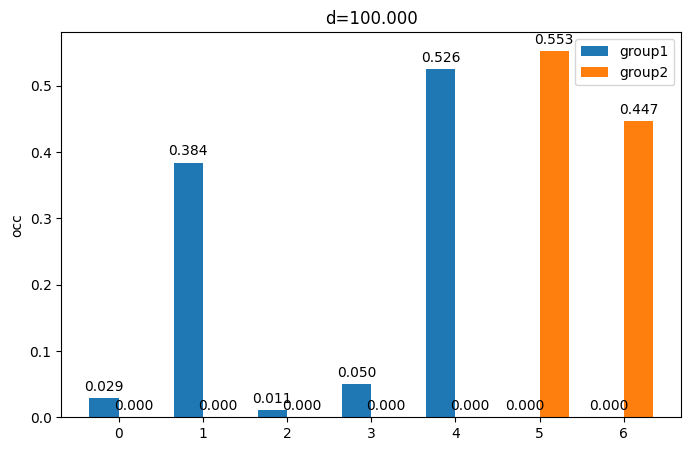

GLU01A0035_001  0.029  0.000
GLU01A0035_002  0.384  0.000
GLU01A0035_006  0.011  0.000
GLU02A0035_007  0.050  0.000
GLU02A0035_009  0.526  0.000
GLU-1A0035_011  0.000  0.553
GLU-1A0035_012  0.000  0.447

ASNA0044_, d= 0.013


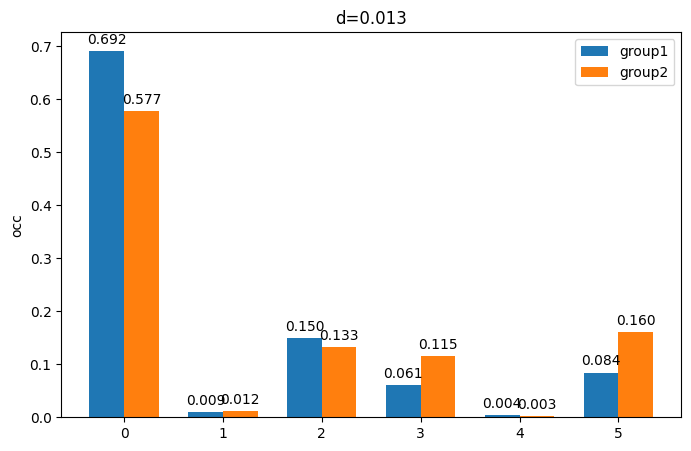

ASN01A0044_001  0.692  0.577
ASN01A0044_002  0.009  0.012
ASN01A0044_003  0.150  0.133
ASN01A0044_004  0.061  0.115
ASN01A0044_005  0.004  0.003
ASN01A0044_006  0.084  0.160

ASNA0046_, d= 0.011


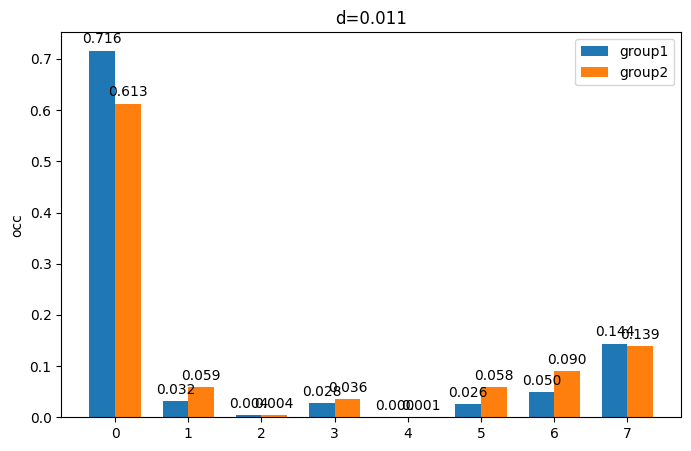

ASN01A0046_001  0.716  0.613
ASN01A0046_002  0.032  0.059
ASN01A0046_003  0.004  0.004
ASN01A0046_004  0.028  0.036
ASN01A0046_006  0.000  0.001
ASN01A0046_007  0.026  0.058
ASN01A0046_008  0.050  0.090
ASN01A0046_009  0.144  0.139

ASPA0052_, d= 0.080


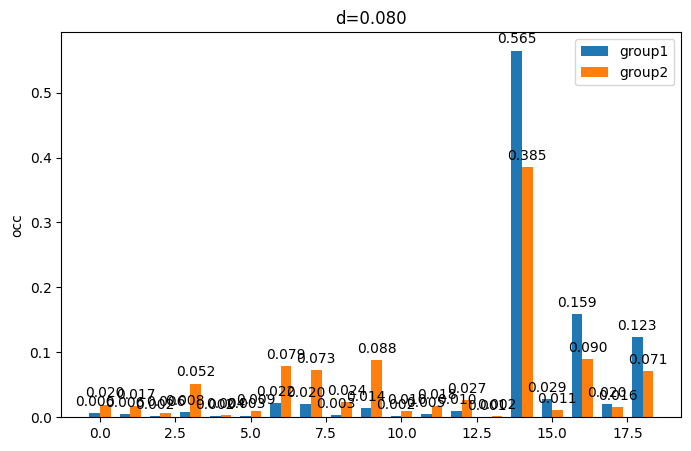

ASP01A0052_002  0.006  0.020
ASP01A0052_003  0.006  0.017
ASP01A0052_004  0.002  0.006
ASP01A0052_006  0.008  0.052
ASP01A0052_009  0.002  0.004
ASP01A0052_010  0.003  0.009
ASP02A0052_011  0.022  0.079
ASP02A0052_012  0.020  0.073
ASP02A0052_013  0.003  0.024
ASP02A0052_014  0.014  0.088
ASP02A0052_016  0.002  0.010
ASP02A0052_017  0.005  0.018
ASP02A0052_018  0.010  0.027
ASP02A0052_019  0.001  0.002
ASP-1A0052_020  0.565  0.385
ASP-1A0052_021  0.029  0.011
ASP-1A0052_022  0.159  0.090
ASP-1A0052_023  0.020  0.016
ASP-1A0052_024  0.123  0.071



In [30]:
# Example 2: When GLU35 is ionized, what residues change conformation?
glu_charged_confs = ["GLU-1A0035_011", "GLU-1A0035_012", "GLU-1A0035_013", "GLU-1A0035_014"]
glu_charged_ms, glu_neutral_ms = mc.select_by_conformer(mc.microstates, conformer_in=glu_charged_confs)
conf_occ_glu_charged = mc.get_occ(glu_charged_ms)
conf_occ_glu_neutral = mc.get_occ(glu_neutral_ms)
for res in mc.free_residues:
    resid = mc.conformers[res[0]].resid
    prob1 = [conf_occ_glu_neutral[ic] for ic in res]
    prob2 = [conf_occ_glu_charged[ic] for ic in res]
    d = bhata_distance(prob1, prob2)
    if d > 0.01:
        print("%s, d= %.3f" % (resid, d))
        plot_prob(prob1, prob2, d)
        for ic in res:
            print("%s %6.3f %6.3f" % (mc.conformers[ic].confid, conf_occ_glu_neutral[ic], conf_occ_glu_charged[ic]))
        print()

### Example 3. Microstates selection - Thermaldynamic box

GLU35 and ASP52 ionization

<pre>
Group A: GLU35-H | ASP52-H 
Group B: GLU35-H | ASP52-
Group C: GLU35-  | ASP52-H 
Group D: GLU35-  | ASP52-
</pre>

The reaction is A to D, there are two paths A to B to D, and A to C to D.

This example will calculate the energy change of the two paths. In the example, we will see microstates selection can be on selected microstates.

In [31]:
# find charged GLU35 and ASP52 conformers:
GLU35_ionized = [x.confid for x in mc.conformers if x.confid.find("GLU-1A0035") ==0]
print(GLU35_ionized)

ASP52_ionized = [x.confid for x in mc.conformers if x.confid.find("ASP-1A0052") ==0]
print(ASP52_ionized)

['GLU-1A0035_011', 'GLU-1A0035_012', 'GLU-1A0035_013', 'GLU-1A0035_014']
['ASP-1A0052_020', 'ASP-1A0052_021', 'ASP-1A0052_022', 'ASP-1A0052_023', 'ASP-1A0052_024']


In [32]:
GLU35_ionized_ms, GLU35_neutral_ms = mc.select_by_conformer(mc.microstates, conformer_in=GLU35_ionized)

In [33]:
GLU35_ionized_ASP52_ionized_ms, GLU35_ionized_ASP52_neutral_ms = mc.select_by_conformer(GLU35_ionized_ms, conformer_in=ASP52_ionized) 

In [34]:
GLU35_neutral_ASP52_ionized_ms, GLU35_neutral_ASP52_neutral_ms = mc.select_by_conformer(GLU35_neutral_ms, conformer_in=ASP52_ionized) 

In [35]:
Group_A_ms = GLU35_neutral_ASP52_neutral_ms
Group_B_ms = GLU35_neutral_ASP52_ionized_ms
Group_C_ms = GLU35_ionized_ASP52_neutral_ms
Group_D_ms = GLU35_ionized_ASP52_ionized_ms

In [36]:
Group_A_E = average_e(Group_A_ms)
Group_B_E = average_e(Group_B_ms)
Group_C_E = average_e(Group_C_ms)
Group_D_E = average_e(Group_D_ms)

In [37]:
print("Box with E:\n")
print("dE from A -> B %8.3f Kcal/mol" % (Group_B_E - Group_A_E))
print("dE from B -> D %8.3f Kcal/mol" % (Group_D_E - Group_B_E))
print()
print("dE from A -> C %8.3f Kcal/mol" % (Group_C_E - Group_A_E))
print("dE from C -> D %8.3f Kcal/mol" % (Group_D_E - Group_C_E))
print()
print("dE from A -> D %8.3f Kcal/mol" % (Group_D_E - Group_A_E))

Box with E:

dE from A -> B   -2.646 Kcal/mol
dE from B -> D    0.889 Kcal/mol

dE from A -> C   -0.412 Kcal/mol
dE from C -> D   -1.345 Kcal/mol

dE from A -> D   -1.758 Kcal/mol


The energies of the 4 corners calculated here are internal energy, or enthalpy H if PV (pressure, Volume) remains constant.

If one wants to know the free energy change of the thermal dynamic box, use the population at each state.

In [38]:
G_AB = -math.log(get_count(Group_B_ms)/get_count(Group_A_ms))/Kcal2kT
G_BD = -math.log(get_count(Group_D_ms)/get_count(Group_B_ms))/Kcal2kT
G_AC = -math.log(get_count(Group_C_ms)/get_count(Group_A_ms))/Kcal2kT
G_CD = -math.log(get_count(Group_D_ms)/get_count(Group_C_ms))/Kcal2kT

In [39]:
print("Box with dG:\n")
print("dG from A -> B      %8.3f Kcal/mol" % (G_AB))
print("dG from B -> D      %8.3f Kcal/mol" % (G_BD))
print("dG from A -> B -> D %8.3f Kcal/mol" % (G_AB + G_BD))
print()
print("dG from A -> C      %8.3f Kcal/mol" % (G_AC))
print("dG from C -> D      %8.3f Kcal/mol" % (G_CD))
print("dG from A -> C -> D %8.3f Kcal/mol" % (G_AC + G_CD))

Box with dG:

dG from A -> B        -1.274 Kcal/mol
dG from B -> D         1.055 Kcal/mol
dG from A -> B -> D   -0.219 Kcal/mol

dG from A -> C        -0.046 Kcal/mol
dG from C -> D        -0.173 Kcal/mol
dG from A -> C -> D   -0.219 Kcal/mol


It is not accurate to calculate entropy from microstate counts as the counts are generally too small on high energy microstates.

## Microstates in reduced expression

The original microstate is composed by one conformer from each free residue. There are times we only need "reduced" microstates. For example, we may only care about ionizable residue and the ionization state of these residues. At other times, we only want to know the conformational changes of certain residues instead of all free residues.

In either case, we can reduce the microstate expression and make the number of microstates significantly smaller.


### Example 1. Charge microstates

Charge microstates have the similar structure as native microstate. It has elements:
* crg_stateid instead of stateid
* average_E instead of E
* count the same as count

It has a function of state() the same as native microstate.

To convert the from native microstates to charge states, use function in MC class MC.convert_to_chargems(). The charge microstate id has the same array length as native microstate so that they both match the number of free residues.

In [40]:
# Convert to charge microstates
charge_microstates = mc.convert_to_charge_ms()

print("Total number of charge microstates = %d" % len(charge_microstates))

Total number of charge microstates = 427


In [41]:
crg_ms0 = charge_microstates[0]    # pick a microstate from charge microstates list
print(crg_ms0.crg_stateid)         # microstate ID 
print(crg_ms0.state())             # microstate ID human readable form 
print(crg_ms0.count)               # counts, how mane times this microstate has been chosen
print(crg_ms0.average_E)           # microstate energy

b'x\x9c3T0T0\x00b]\x10\x05b\x18\x82\x05\xe0\\\x03\x14\x1a\x01!"\xba(\x14\x16YC\x1c\xda\x91t\x18*`5\xc4\x10.\x85\xa6V\xd7\x10\x00\x0e\x93\x1cr'
[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 0, 1, 1, -1]
344917
-204.51025260997434


In [42]:
# Which charge microstate is the most dominant?

charge_microstates.sort(key=lambda x: x.count)
total_crgms = 0

for crg_ms in charge_microstates:
    total_crgms += crg_ms.count

for crg_ms in charge_microstates[-10:]:
    print(crg_ms.state(), crg_ms.count, crg_ms.average_E)
print("%d charge microstates" % len(charge_microstates))
print("%d total microstates" % total_crgms)

[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 0, 1, 1, -1] 50978 -203.57749330689668
[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 0, 1, 1, -1] 58882 -202.47910099254497
[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, -1] 61471 -201.8789185458995
[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0

#### How do top charge microstates dominate the ms population

In [43]:
top_picks = 50
top_crgms = charge_microstates[-top_picks:]
top_crgms.sort(key=lambda x: x.count, reverse=True)
top_counts = [x.count for x in top_crgms]
top_averageE = [x.average_E for x in top_crgms]
top_percentage = [x.count/total_crgms for x in top_crgms]

print("## %8s %8s %8s %8s" % ("Counts", "%", "Accum %", "Energy"))
accum_pct = 0.0
top_accum = []
for i in range(top_picks):
    accum_pct += top_percentage[i]
    top_accum.append(accum_pct)
    print("%2d %8d %8.3f %8.3f %8.2f" % (i+1, top_counts[i], top_percentage[i], accum_pct, top_averageE[i]))

##   Counts        %  Accum %   Energy
 1   529489    0.241    0.241  -203.61
 2   344917    0.157    0.397  -204.51
 3    99015    0.045    0.442  -202.44
 4    86232    0.039    0.482  -201.61
 5    74470    0.034    0.516  -201.11
 6    72865    0.033    0.549  -201.48
 7    67983    0.031    0.580  -200.72
 8    61471    0.028    0.607  -201.88
 9    58882    0.027    0.634  -202.48
10    50978    0.023    0.657  -203.58
11    46268    0.021    0.678  -202.57
12    46071    0.021    0.699  -203.08
13    44289    0.020    0.720  -201.83
14    42522    0.019    0.739  -202.27
15    41954    0.019    0.758  -202.27
16    39670    0.018    0.776  -202.52
17    22483    0.010    0.786  -201.92
18    19815    0.009    0.795  -202.80
19    14581    0.007    0.802  -201.65
20    14460    0.007    0.808  -201.01
21    13377    0.006    0.814  -201.37
22    12633    0.006    0.820  -199.28
23    12361    0.006    0.826  -200.67
24    12030    0.005    0.831  -200.39
25    10144    0.005    0

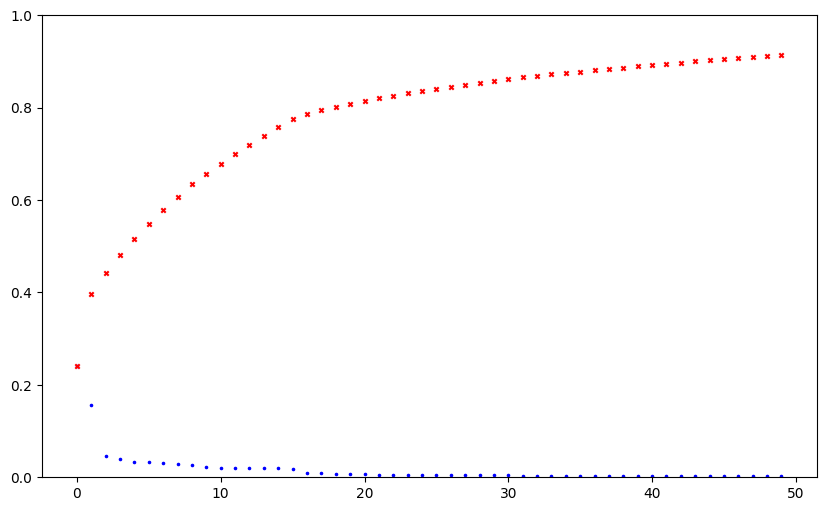

In [44]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_ylim([0, 1])
ax1.scatter(range(top_picks), top_percentage, s=10, c='b', marker = ".")
ax1.scatter(range(top_picks), top_accum, s=10, c='r', marker="x")
plt.show()

In [45]:
# Top 30 charge microstates charge comparison
# print(len(mc.free_residue_names))
# print(len(top_crgms[0].state()))
for i_res in range(len(mc.free_residue_names)):
    resname = mc.free_residue_names[i_res]
    charges = []
    for i in range(30):
        charges.append(top_crgms[i].state()[i_res])
    charges_str = " ".join(["%2d" % x for x in charges])
    if len(set(charges))>1:  # only print the residues that have changed ionization
        print(resname, charges_str)
    

NTRA0001_  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1
GLUA0007_ -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
HISA0015_  1  1  1  0  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  0  1  1  0  0  1  1  1  0  0
GLUA0035_  0  0 -1  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0 -1  0 -1 -1 -1  0  0 -1  0 -1 -1  0
ASPA0052_ -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1
ASPA0066_ -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1
ASPA0101_  0 -1  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  0
ASPA0119_ -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1  0
CTRA0129_ -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1


### Example 2: Reduce to selected residues

Let's say we are only interested in residues:
* ASNA0046_
* GLUA0035_
* ASPA0052_

The microstates will use the iconf selection of these residues only. The actual microstates will be grouped based on the conformer selection of these three residues.

Compare with the native microstate
* sub_stateid instead of stateid
* average_E instead of E
* count the same as count

It has a function of state() the same as native microstate.

To convert the from native microstates to charge states, use function in MC class MC.convert_to_subset_ms(). The subset microstate id has the length of residues of interest provided.


In [46]:
res_of_interest = ["ASNA0046_", "GLUA0035_", "ASPA0052_"]

In [47]:
# Convert to subset microstates
subset_microstates = mc.convert_to_subset_ms(res_of_interest)

Check basic information
* how many microstates
* count of each microstate
* average energy of the microstate

In [48]:
print("Total number of subset microstates %d" % len(subset_microstates))

Total number of subset microstates 677


In [49]:
# Show selectable conformers
Total_max = 1
for res in res_of_interest:
    ires = mc.free_residue_names.index(res)
    confs = mc.free_residues[ires]
    print(res, confs)
    Total_max *= len(confs)
    
print("Maximum possible microstates: %d" % Total_max)

ASNA0046_ [402, 403, 404, 405, 407, 408, 409, 410]
GLUA0035_ [253, 254, 258, 259, 261, 263, 264]
ASPA0052_ [501, 502, 503, 505, 508, 509, 510, 511, 512, 513, 515, 516, 517, 518, 519, 520, 521, 522, 523]
Maximum possible microstates: 1064


In [50]:
# Sort from most occupied to least occupied
subset_microstates.sort(key=lambda x: x.count, reverse=True)
for ms in subset_microstates:
    print("%s: count = %4d, E_average = %.3f" % (str(ms.state()), ms.count, ms.average_E))

[402, 261, 519]: count = 414555, E_average = -203.893
[402, 254, 519]: count = 298812, E_average = -203.901
[402, 261, 521]: count = 107210, E_average = -202.987
[402, 254, 521]: count = 81293, E_average = -202.702
[402, 263, 519]: count = 78448, E_average = -202.603
[402, 261, 523]: count = 76403, E_average = -202.637
[410, 261, 519]: count = 71473, E_average = -202.688
[402, 264, 519]: count = 66635, E_average = -202.485
[402, 254, 523]: count = 62482, E_average = -202.439
[410, 254, 519]: count = 57355, E_average = -202.505
[402, 259, 519]: count = 34525, E_average = -202.629
[402, 253, 519]: count = 22081, E_average = -202.000
[410, 261, 523]: count = 21582, E_average = -201.657
[402, 261, 520]: count = 20059, E_average = -201.899
[410, 261, 521]: count = 19911, E_average = -201.432
[402, 263, 521]: count = 16709, E_average = -201.686
[402, 264, 521]: count = 14852, E_average = -201.477
[402, 263, 513]: count = 14337, E_average = -201.182
[410, 254, 521]: count = 14045, E_average =

### Top microstates (subset microstates)

In [51]:
total_subms = sum([x.count for x in subset_microstates])

top_picks = 50
top_subms = subset_microstates[:top_picks]
top_counts = [x.count for x in top_subms]
top_averageE = [x.average_E for x in top_subms]
top_percentage = [x.count/total_subms for x in top_subms]

print("## %8s %8s %8s %8s" % ("Counts", "%", "Accum %", "Energy"))
accum_pct = 0.0
top_accum = []
for i in range(top_picks):
    accum_pct += top_percentage[i]
    top_accum.append(accum_pct)
    print("%2d %8d %8.3f %8.3f %8.2f" % (i+1, top_counts[i], top_percentage[i], accum_pct, top_averageE[i]))

##   Counts        %  Accum %   Energy
 1   414555    0.188    0.188  -203.89
 2   298812    0.136    0.324  -203.90
 3   107210    0.049    0.373  -202.99
 4    81293    0.037    0.410  -202.70
 5    78448    0.036    0.446  -202.60
 6    76403    0.035    0.480  -202.64
 7    71473    0.032    0.513  -202.69
 8    66635    0.030    0.543  -202.48
 9    62482    0.028    0.572  -202.44
10    57355    0.026    0.598  -202.50
11    34525    0.016    0.613  -202.63
12    22081    0.010    0.623  -202.00
13    21582    0.010    0.633  -201.66
14    20059    0.009    0.642  -201.90
15    19911    0.009    0.651  -201.43
16    16709    0.008    0.659  -201.69
17    14852    0.007    0.666  -201.48
18    14337    0.007    0.672  -201.18
19    14045    0.006    0.679  -201.81
20    13790    0.006    0.685  -201.07
21    13767    0.006    0.691  -201.13
22    13232    0.006    0.697  -201.93
23    12809    0.006    0.703  -201.70
24    12462    0.006    0.709  -202.44
25    12399    0.006    0

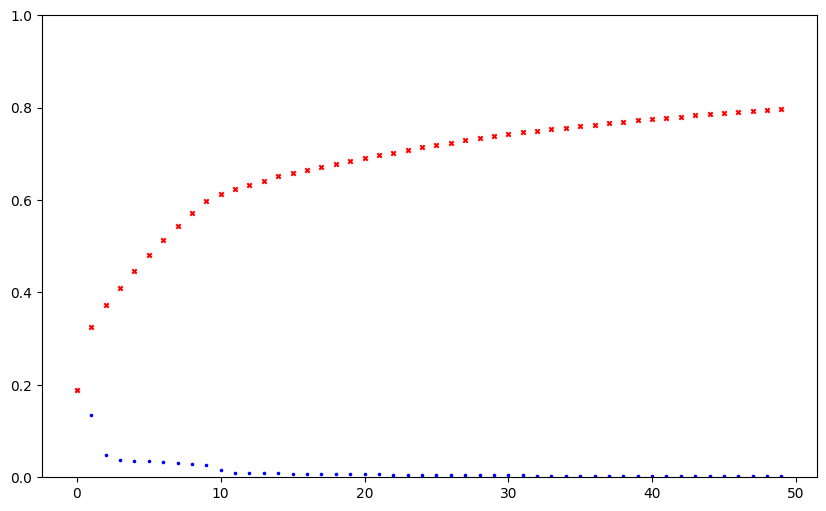

In [52]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_ylim([0, 1])
ax1.scatter(range(top_picks), top_percentage, s=10, c='b', marker = ".")
ax1.scatter(range(top_picks), top_accum, s=10, c='r', marker="x")
plt.show()

### Bin microstates (subset microstates) by energy

In [53]:
nbins = 10
erange, total_counts = bin_mscounts_total(subset_microstates, nbins=nbins)
_, uniq_counts = bin_mscounts_unique(subset_microstates, nbins=nbins)

print("%8s %6s %6s" % ("Energy", "    #total", "#uniq"))
for i in range(len(erange)):
    print("%8.3f %10d %6d" % (erange[i], total_counts[i], uniq_counts[i]))

  Energy     #total  #uniq
-207.727        340      9
-205.909       1090      9
-204.091    1383040     43
-202.273     607454    212
-200.455     162763    204
-198.637      31655    102
-196.819      10483     55
-195.001       2262     26
-193.183        740     13
-191.365        173      4
